In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.cluster import KMeans 
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import MinMaxScaler

In [2]:
iris = pd.read_csv("IRIS.csv")
x = iris.iloc[:, [0, 1, 2, 3]].values

In [3]:
iris.info()
iris[0:10]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
#Frequency distribution of species"
iris_outcome = pd.crosstab(index=iris["species"],  # Make a crosstab
                              columns="count")      # Name the count column

iris_outcome

col_0,count
species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


In [5]:
iris_setosa=iris.loc[iris["species"]=="Iris-setosa"]
iris_virginica=iris.loc[iris["species"]=="Iris-virginica"]
iris_versicolor=iris.loc[iris["species"]=="Iris-versicolor"]

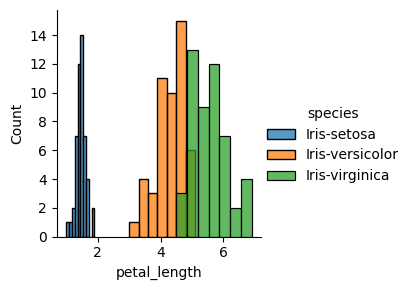

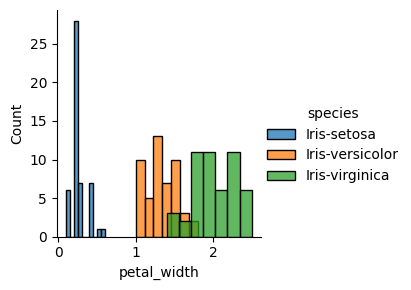

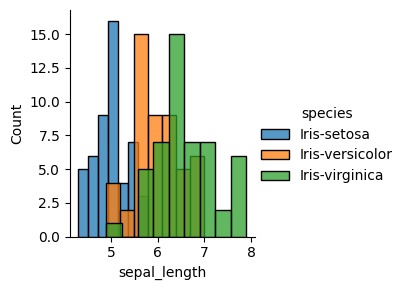

In [6]:
sns.FacetGrid(iris,hue="species",height=3).map(sns.histplot,"petal_length").add_legend()
sns.FacetGrid(iris,hue="species",height=3).map(sns.histplot,"petal_width").add_legend()
sns.FacetGrid(iris,hue="species",height=3).map(sns.histplot,"sepal_length").add_legend()
plt.show()

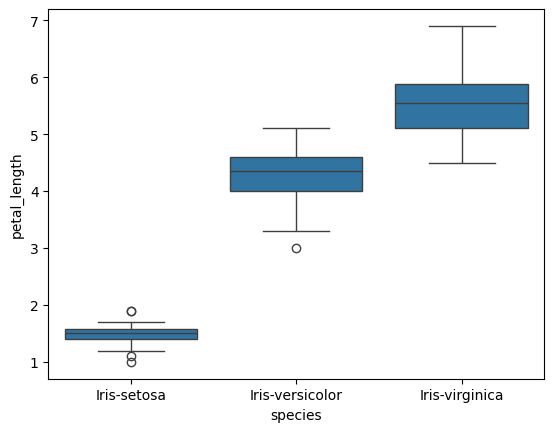

In [7]:
sns.boxplot(x="species",y="petal_length",data=iris)
plt.show()

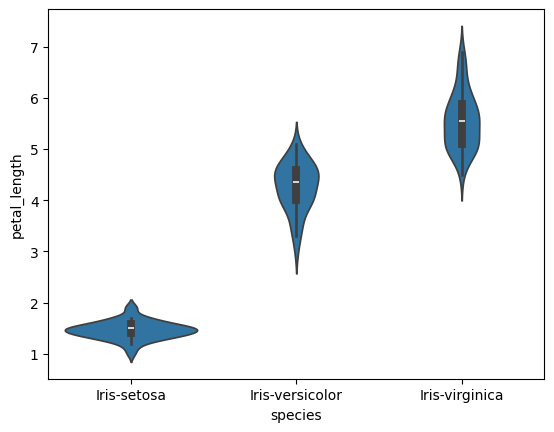

In [8]:
sns.violinplot(x="species",y="petal_length",data=iris)
plt.show()

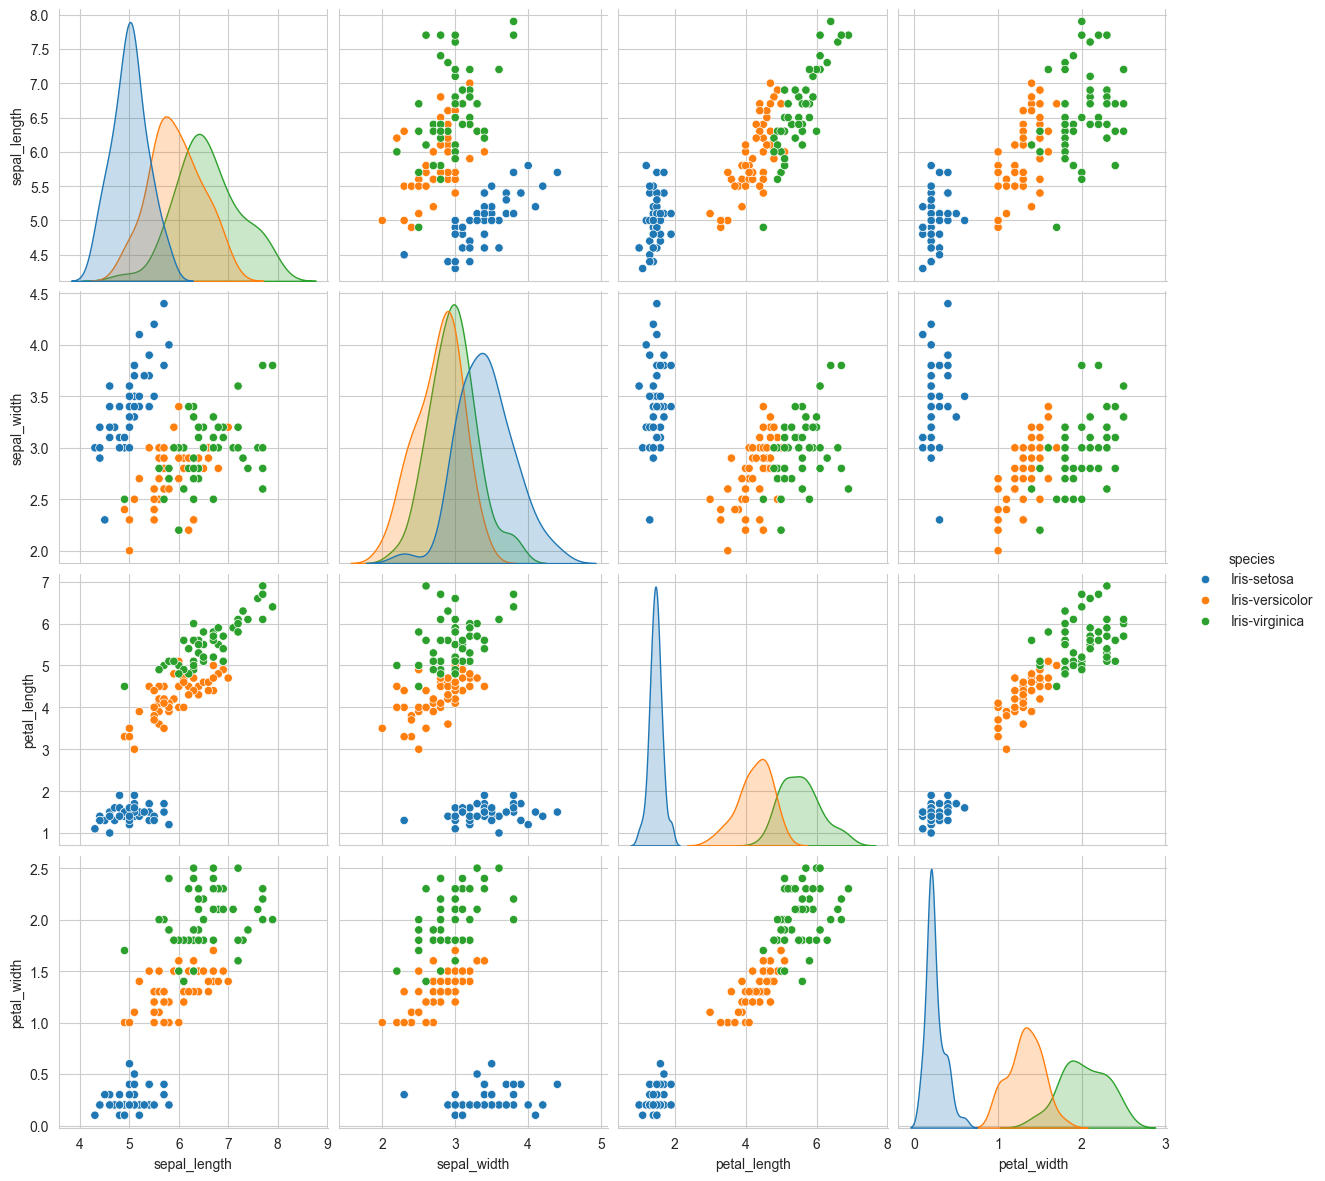

In [9]:
sns.set_style("whitegrid")
sns.pairplot(iris,hue="species",height=3);
plt.show()

In [10]:
#Finding the optimum number of clusters for k-means classification
from sklearn.cluster import KMeans
wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

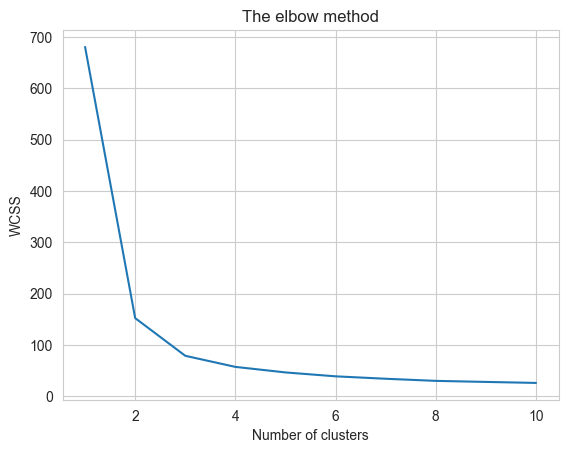

In [11]:
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') #within cluster sum of squares
plt.show()

In [12]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

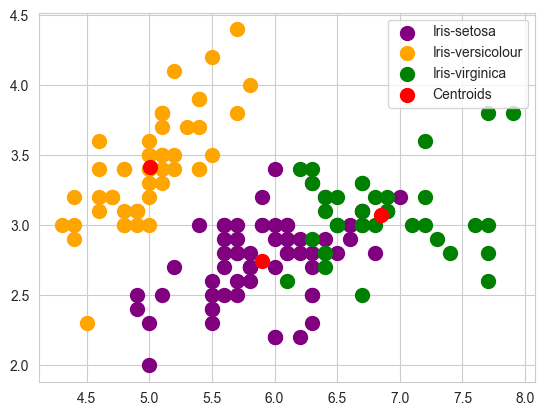

In [13]:
#Visualising the clusters
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

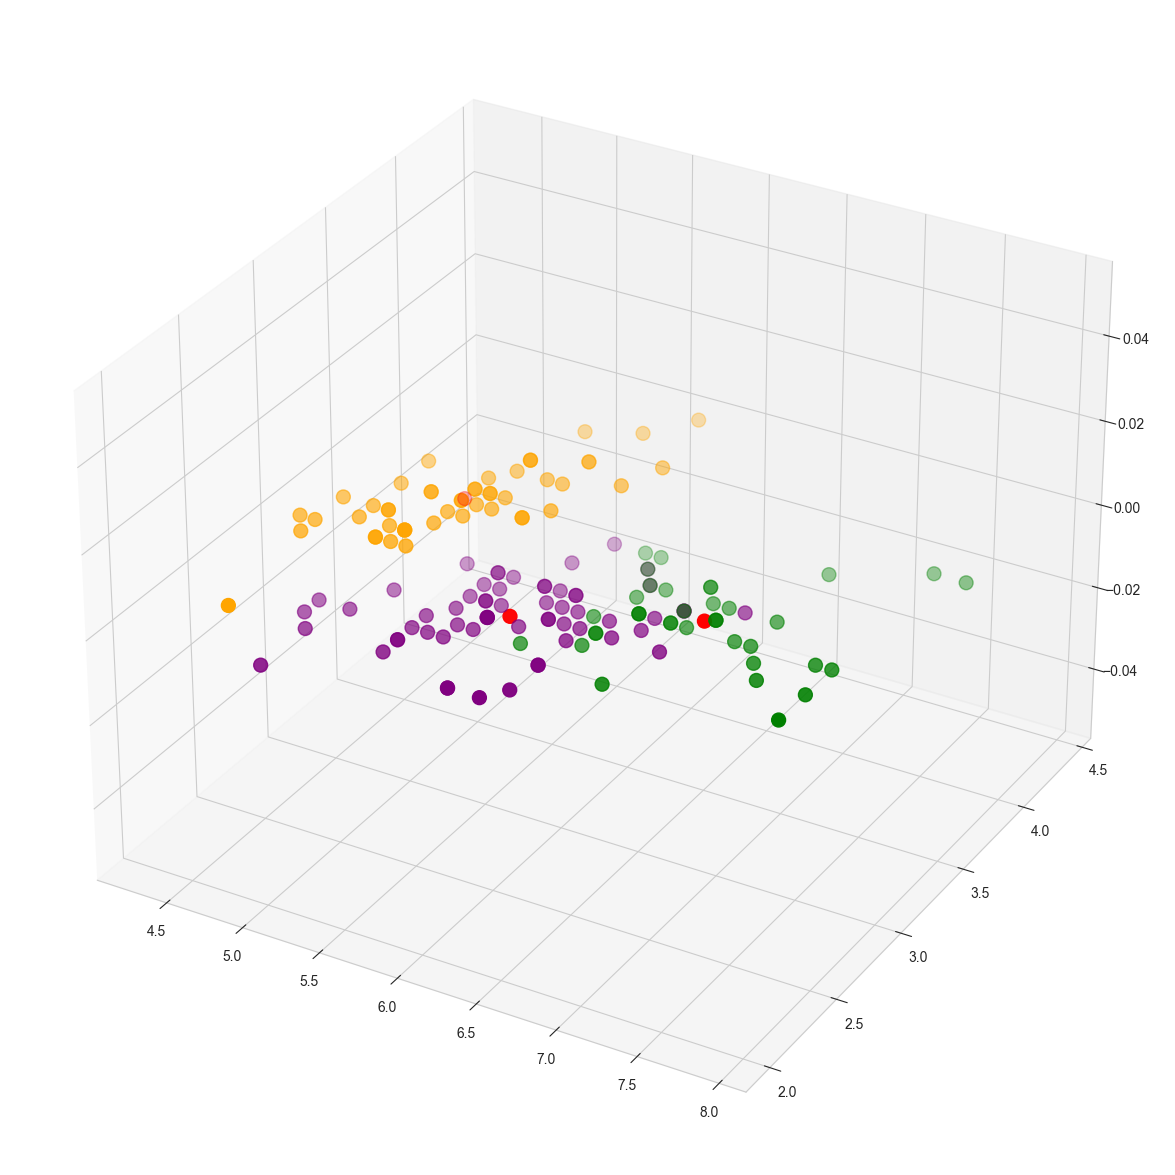

In [14]:
# 3d scatterplot using matplotlib

fig = plt.figure(figsize = (15,15))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Iris-virginica')

#Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')
plt.show()

In [15]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression

iris=load_iris()

X=iris.data
Y=iris.target

logreg=LogisticRegression(max_iter=500)
kf=KFold(n_splits=5)
score=cross_val_score(logreg,X,Y,cv=kf)

print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1.         1.         0.86666667 0.93333333 0.83333333]
Average Cross Validation score :0.9266666666666665


In [16]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression

iris=load_iris()

X=iris.data
Y=iris.target

logreg=LogisticRegression(max_iter=500)
kf=KFold(n_splits=10)
score=cross_val_score(logreg,X,Y,cv=kf)

print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1.         1.         1.         1.         0.93333333 0.86666667
 1.         0.86666667 0.86666667 0.93333333]
Average Cross Validation score :0.9466666666666667


In [17]:
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LogisticRegression

iris=load_iris()

X=iris.data
Y=iris.target

logreg=LogisticRegression(max_iter=500)
kf=KFold(n_splits=20)
score=cross_val_score(logreg,X,Y,cv=kf)

print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1.         1.         1.         1.         1.         1.
 1.         1.         0.875      0.875      0.85714286 1.
 1.         0.85714286 1.         0.85714286 0.85714286 0.85714286
 1.         1.        ]
Average Cross Validation score :0.9517857142857145
